### Imports

In [1]:
import os
import time
from matplotlib import pyplot as plt
from skimage import img_as_ubyte, io, color
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from joblib import dump

### Creating path varibales and a function for fetching the data

In [2]:
train_path = 'CW_Dataset_current/train'
test_path = 'CW_Dataset_current/test'

personal_path = 'Personal_Dataset'

"""
The following function get_data was provided from the tutorial, with major modification from me to suit my model
"""

def get_data(folder_path):
    print("Fetching data...")
    images = []
    labels = []
    folder_names = [folder for folder in sorted(os.listdir(folder_path)) if not folder.startswith('.')]
    
    for folder in folder_names:
        file_names = [file for file in sorted(os.listdir(os.path.join(folder_path, folder))) if file.endswith('.jpg')]
        for file in file_names:    
            img = io.imread(os.path.join(folder_path, folder, file))
            images.append(img)
            labels.append(folder)
    
    print("Done!")
    return images, labels

### Fetching the Data

In [3]:
X, y = get_data(train_path)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

Fetching data...
Done!


### For every image in the training set generate a histogram of gradients

Generating HOG features...
Feature Descriptor time: 55.883127212524414s


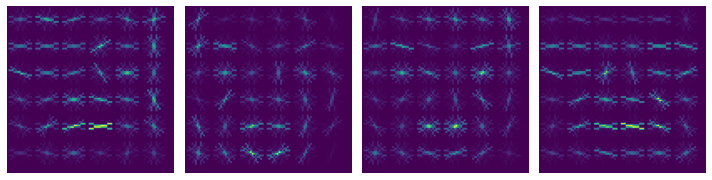

Done!


In [4]:
print("Generating HOG features...")
start_time = time.time()
fig, ax = plt.subplots(1, 4, figsize=(10, 8), sharey=True)

ppc = 16
hog_features_train = []

"""
The following code was provided by me until the end block mark
"""

for i in range(len(X_train)):
    img = img_as_ubyte(color.rgb2gray(X_train[i]))
    fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1), visualize=True)
    hog_features_train.append(fd)
    
    if i < 4:
        ax[i].imshow(hog_image)
        ax[i].set_axis_off()

print(f"Feature Descriptor time: {time.time() - start_time}s")
fig.tight_layout()
plt.show()
        
"""
End block
"""
    
print("Done!")

### Training a SVM classifier using the histograms of gradients

In [5]:
print("Training an SVC...")
start_time = time.time()
classifier = svm.SVC()

classifier.fit(hog_features_train,y_train)
print("Done!")

print(f"Training time: {time.time() - start_time}s")

Training an SVC...
Done!
Training time: 13.464412689208984s


### Saving the model

In [6]:
print("Dumping the model...")
dump(classifier, 'HOG-SVM.joblib') 
print("Done!")

Dumping the model...
Done!


### Testing the model

Testing the model on the test set...
Testing time: 17.64622664451599


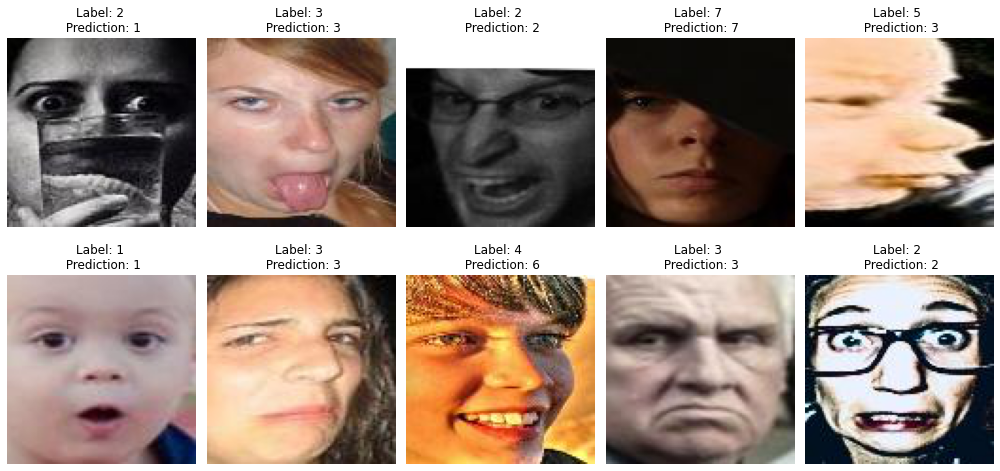


Label explanation:
1: Surprise
2: Fear
3: Disgust
4: Happiness
5: Sadness
6: Anger
7: Neutral
      
Classification report for classifier SVC():
                    precision    recall  f1-score   support

           1       0.62      0.70      0.66       300
           2       0.89      0.91      0.90       300
           3       0.64      0.64      0.64       300
           4       0.70      0.66      0.68       300
           5       0.54      0.51      0.53       300
           6       0.81      0.76      0.78       300
           7       0.50      0.50      0.50       300

    accuracy                           0.67      2100
   macro avg       0.67      0.67      0.67      2100
weighted avg       0.67      0.67      0.67      2100


Done! End of Program.


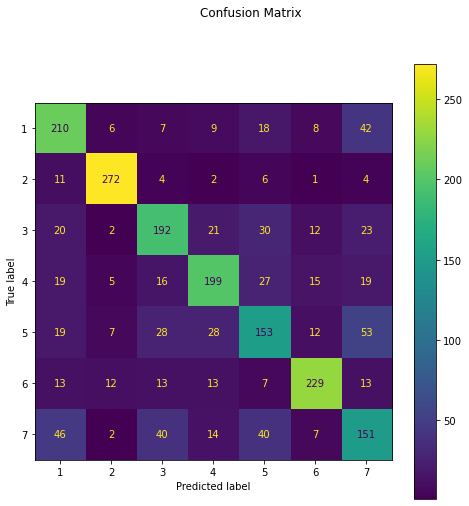

In [7]:
print("Testing the model on the test set...")
start_time = time.time()

"""
The following code until the end block mark was implemented from the tutorial with minor adjustsments to fit my model
"""

hog_features_test = []

for image in X_test:
    image = img_as_ubyte(color.rgb2gray(image))
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1), visualize=True)
    hog_features_test.append(fd)

predicted = classifier.predict(hog_features_test)

print(f"Testing time: {time.time() - start_time}")

fig, axes = plt.subplots(2, 5, figsize=(14, 7), sharex=True, sharey=True)
ax = axes.ravel()

for i in range(10):
    ax[i].imshow(X_test[i])
    ax[i].set_title(f'Label: {y_test[i]} \n Prediction: {predicted[i]}')
    ax[i].set_axis_off()
fig.tight_layout()
plt.show()

"""
End block
"""

print("""
Label explanation:
1: Surprise
2: Fear
3: Disgust
4: Happiness
5: Sadness
6: Anger
7: Neutral
      """)
print(f"""Classification report for classifier {classifier}:
      {metrics.classification_report(y_test, predicted)}\n""")
print("Done! End of Program.")

fig, ax = plt.subplots(figsize=(8, 8))
disp = metrics.plot_confusion_matrix(classifier, hog_features_test, y_test,
                                     values_format = 'd', ax=ax)
disp.figure_.suptitle("Confusion Matrix")
plt.show()
